In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/no/34 no.jpg
/kaggle/input/no/N20.JPG
/kaggle/input/no/N1.JPG
/kaggle/input/no/49 no.jpg
/kaggle/input/no/N15.jpg
/kaggle/input/no/No18.jpg
/kaggle/input/no/31 no.jpg
/kaggle/input/no/no 6.jpg
/kaggle/input/no/3 no.jpg
/kaggle/input/no/no 5.jpeg
/kaggle/input/no/no 1.jpg
/kaggle/input/no/26 no.jpg
/kaggle/input/no/N26.JPG
/kaggle/input/no/N5.jpg
/kaggle/input/no/6 no.jpg
/kaggle/input/no/No21.jpg
/kaggle/input/no/17 no.jpg
/kaggle/input/no/No22.jpg
/kaggle/input/no/29 no.jpg
/kaggle/input/no/46 no.jpg
/kaggle/input/no/32 no.jpg
/kaggle/input/no/42 no.jpg
/kaggle/input/no/no 90.jpg
/kaggle/input/no/no 94.jpg
/kaggle/input/no/No19.jpg
/kaggle/input/no/47 no.jpg
/kaggle/input/no/N22.JPG
/kaggle/input/no/No12.jpg
/kaggle/input/no/15 no.jpg
/kaggle/input/no/20 no.jpg
/kaggle/input/no/No13.jpg
/kaggle/input/no/11 no.jpg
/kaggle/input/no/N11.jpg
/kaggle/input/no/No17.jpg
/kaggle/input/no/no 98.jpg
/kaggle/input/no/18 no.jpg
/kaggle/input/no/N19.JPG
/kaggle/input/no/25 no.jpg
/ka

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
import os
print(os.listdir('/kaggle/input/'))



['no', 'yes', 'brain_tumor_dataset']


In [4]:
import os

# Kiểm tra tất cả các tệp và thư mục bên trong thư mục chính
folder_path = '/kaggle/input/yes/'
print(os.listdir(folder_path))


['Y115.JPG', 'Y192.JPG', 'Y162.jpg', 'Y9.jpg', 'Y108.jpg', 'Y155.JPG', 'Y106.jpg', 'Y258.JPG', 'Y103.jpg', 'Y185.jpg', 'Y180.jpg', 'Y120.JPG', 'Y54.jpg', 'Y165.JPG', 'Y112.JPG', 'Y99.JPG', 'Y3.jpg', 'Y184.JPG', 'Y82.jpg', 'Y169.jpg', 'Y146.JPG', 'Y147.JPG', 'Y116.JPG', 'Y27.jpg', 'Y73.jpg', 'Y181.jpg', 'Y81.jpg', 'Y161.JPG', 'Y17.jpg', 'Y69.jpg', 'Y158.JPG', 'Y32.jpg', 'Y186.jpg', 'Y259.JPG', 'Y42.jpg', 'Y250.jpg', 'Y58.JPG', 'Y60.jpg', 'Y252.jpg', 'Y182.JPG', 'Y154.jpg', 'Y79.jpg', 'Y31.jpg', 'Y98.JPG', 'Y91.jpg', 'Y95.jpg', 'Y22.jpg', 'Y35.jpg', 'Y33.jpg', 'Y247.JPG', 'Y19.JPG', 'Y160.JPG', 'Y13.jpg', 'Y29.jpg', 'Y55.jpg', 'Y4.jpg', 'Y50.JPG', 'Y114.JPG', 'Y26.jpg', 'Y257.jpg', 'Y97.JPG', 'Y14.jpg', 'Y25.jpg', 'Y170.JPG', 'Y51.jpg', 'Y34.jpg', 'Y39.jpg', 'Y15.jpg', 'Y104.jpg', 'Y187.jpg', 'Y167.JPG', 'Y40.JPG', 'Y38.jpg', 'Y111.JPG', 'Y37.jpg', 'Y24.jpg', 'Y157.JPG', 'Y6.jpg', 'Y28.jpg', 'Y164.JPG', 'Y30.jpg', 'Y90.jpg', 'Y92.jpg', 'Y86.JPG', 'Y46.jpg', 'Y248.JPG', 'Y1.jpg', 'Y2.jpg'

In [5]:
import os
import shutil

# Thư mục chỉ đọc ban đầu
input_folder = '/kaggle/input/yes/'

# Thư mục làm việc (có quyền ghi)
output_folder_yes = '/kaggle/working/brain_tumor_dataset/yes/'
output_folder_no = '/kaggle/working/brain_tumor_dataset/no/'

# Tạo thư mục làm việc nếu chưa tồn tại
os.makedirs(output_folder_yes, exist_ok=True)
os.makedirs(output_folder_no, exist_ok=True)

# Đổi tên và sao chép cho thư mục "yes"
count = 1
for filename in os.listdir(input_folder):
    source = input_folder + filename
    destination = output_folder_yes + "Y_" + str(count) + ".jpg"
    shutil.copy(source, destination)
    count += 1
print("All files are copied and renamed in the yes directory.")

# Đổi tên và sao chép cho thư mục "no"
input_folder_no = '/kaggle/input/no/'
count = 1
for filename in os.listdir(input_folder_no):
    source = input_folder_no + filename
    destination = output_folder_no + "N_" + str(count) + ".jpg"
    shutil.copy(source, destination)
    count += 1
print("All files are copied and renamed in the no directory.")


All files are copied and renamed in the yes directory.
All files are copied and renamed in the no directory.


In [6]:
listyes = os.listdir("/kaggle/working/brain_tumor_dataset/yes")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("/kaggle/working/brain_tumor_dataset/no")
number_files_no = len(listno)
print(number_files_no)

155
98


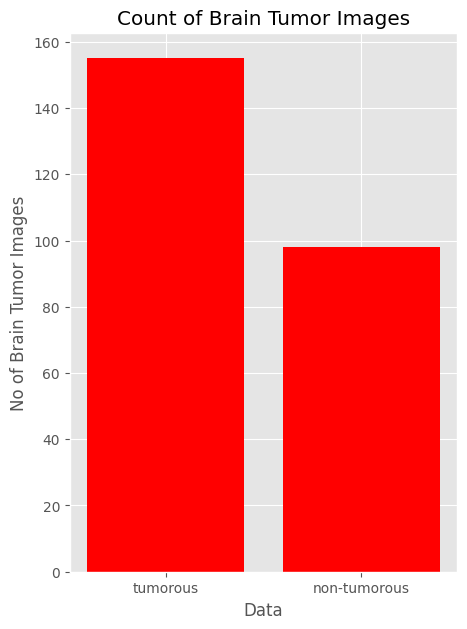

In [7]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}



In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [9]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [10]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [11]:
import os
import time

start_time = time.time()

yes_path = '/kaggle/working/brain_tumor_dataset/yes' 
no_path = '/kaggle/working/brain_tumor_dataset/no'

augmented_data_path = '/kaggle/working/augmented_data/'

# Tạo thư mục nếu chưa tồn tại
if not os.path.exists(augmented_data_path + 'yes'):
    os.makedirs(augmented_data_path + 'yes')
if not os.path.exists(augmented_data_path + 'no'):
    os.makedirs(augmented_data_path + 'no')

# Thực hiện augmentation
augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))


0:1:21.62410831451416


In [12]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/" 
    no_path = "augmented_data/no/"
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n = (n_pos + n_neg)
    
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    
    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

In [13]:
data_summary(augmented_data_path)

Number of sample: 2065
1085 Number of positive sample in percentage: 52.54237288135593%
980 Number of negative sample in percentage: 47.45762711864407%


In [14]:
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

1085
980


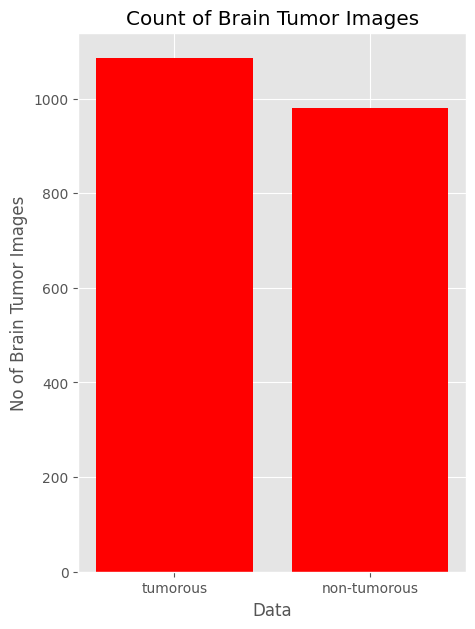

In [15]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

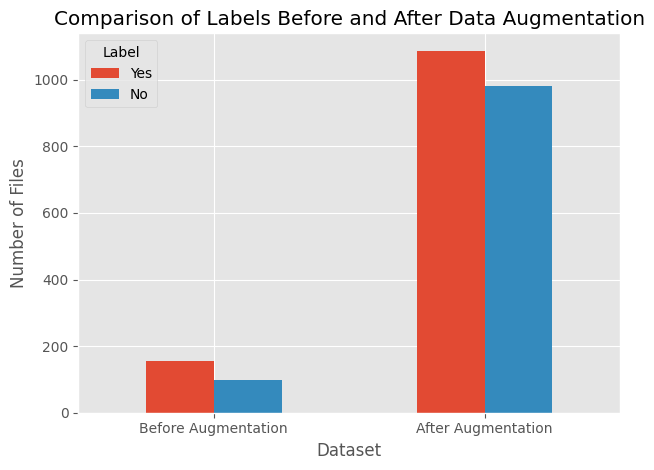

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for plotting
data = {
    'Dataset': ['Before Augmentation', 'After Augmentation'],
    'Yes': [155, 1085],
    'No': [98, 980]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots()
df.plot(x='Dataset', kind='bar', ax=ax)

# Set the title and labels
ax.set_title('Comparison of Labels Before and After Data Augmentation')
ax.set_xlabel('Dataset')
ax.set_ylabel('Number of Files')
ax.set_xticklabels(df['Dataset'], rotation=0)

# Adding legend
plt.legend(title='Label', labels=['Yes', 'No'])

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
pip install imutils

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=77a407936e5f1409d4e2ca9fb0336181d9b5e7af33f891e3a478f3bf6dfe8ae6
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [17]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

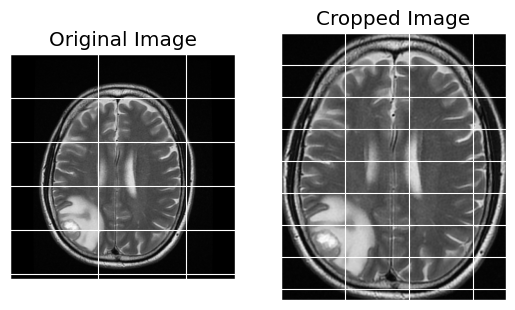

array([[[4, 4, 4],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [5, 5, 5],
        [4, 4, 4],
        [4, 4, 4]],

       [[2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [5, 5, 5],
        [4, 4, 4]],

       ...,

       [[5, 5, 5],
        [4, 4, 4],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [5, 5, 5],
        [4, 4, 4],
        [3, 3, 3]],

       [[3, 3, 3],
        [4, 4, 4],
        [3, 3, 3],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [4, 4, 4]]], dtype=uint8)

In [18]:
img = cv2.imread('/kaggle/working/brain_tumor_dataset/yes/Y_49.jpg')
crop_brain_tumor(img, True)

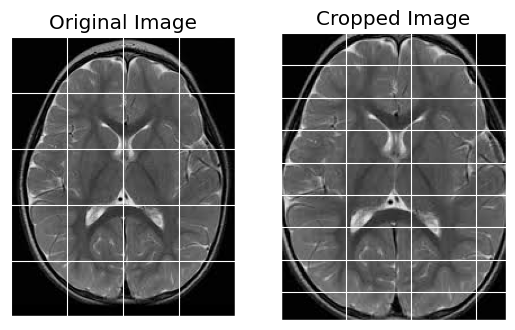

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]], dtype=uint8)

In [19]:
img = cv2.imread('/kaggle/working/brain_tumor_dataset/no/N_45.jpg')
crop_brain_tumor(img, True)

In [20]:
import os

# Định nghĩa đường dẫn
base_path = '/kaggle/working/augmented_data'
folder1 = os.path.join(base_path, 'no')
folder2 = os.path.join(base_path, 'yes')

# Tạo các thư mục
os.makedirs(folder1, exist_ok=True)
os.makedirs(folder2, exist_ok=True)

print(f"Đã tạo thư mục: {folder1}")
print(f"Đã tạo thư mục: {folder2}")

# Cập nhật biến folder1 và folder2 để sử dụng trong code sau này
folder1 = '/kaggle/working/augmented_data/no'
folder2 = '/kaggle/working/augmented_data/yes'

# Kiểm tra xem thư mục đã được tạo chưa
print(f"Thư mục 'no' tồn tại: {os.path.exists(folder1)}")
print(f"Thư mục 'yes' tồn tại: {os.path.exists(folder2)}")

Đã tạo thư mục: /kaggle/working/augmented_data/no
Đã tạo thư mục: /kaggle/working/augmented_data/yes
Thư mục 'no' tồn tại: True
Thư mục 'yes' tồn tại: True


In [21]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    
    image_width, image_height=image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    
    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y
            

In [22]:
augmented_path = 'augmented_data/'
augmeneted_yes = augmented_path + 'yes'
augmeneted_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 2065
X SHAPE is : (2065, 240, 240, 3)
y SHAPE is : (2065,)


In [23]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

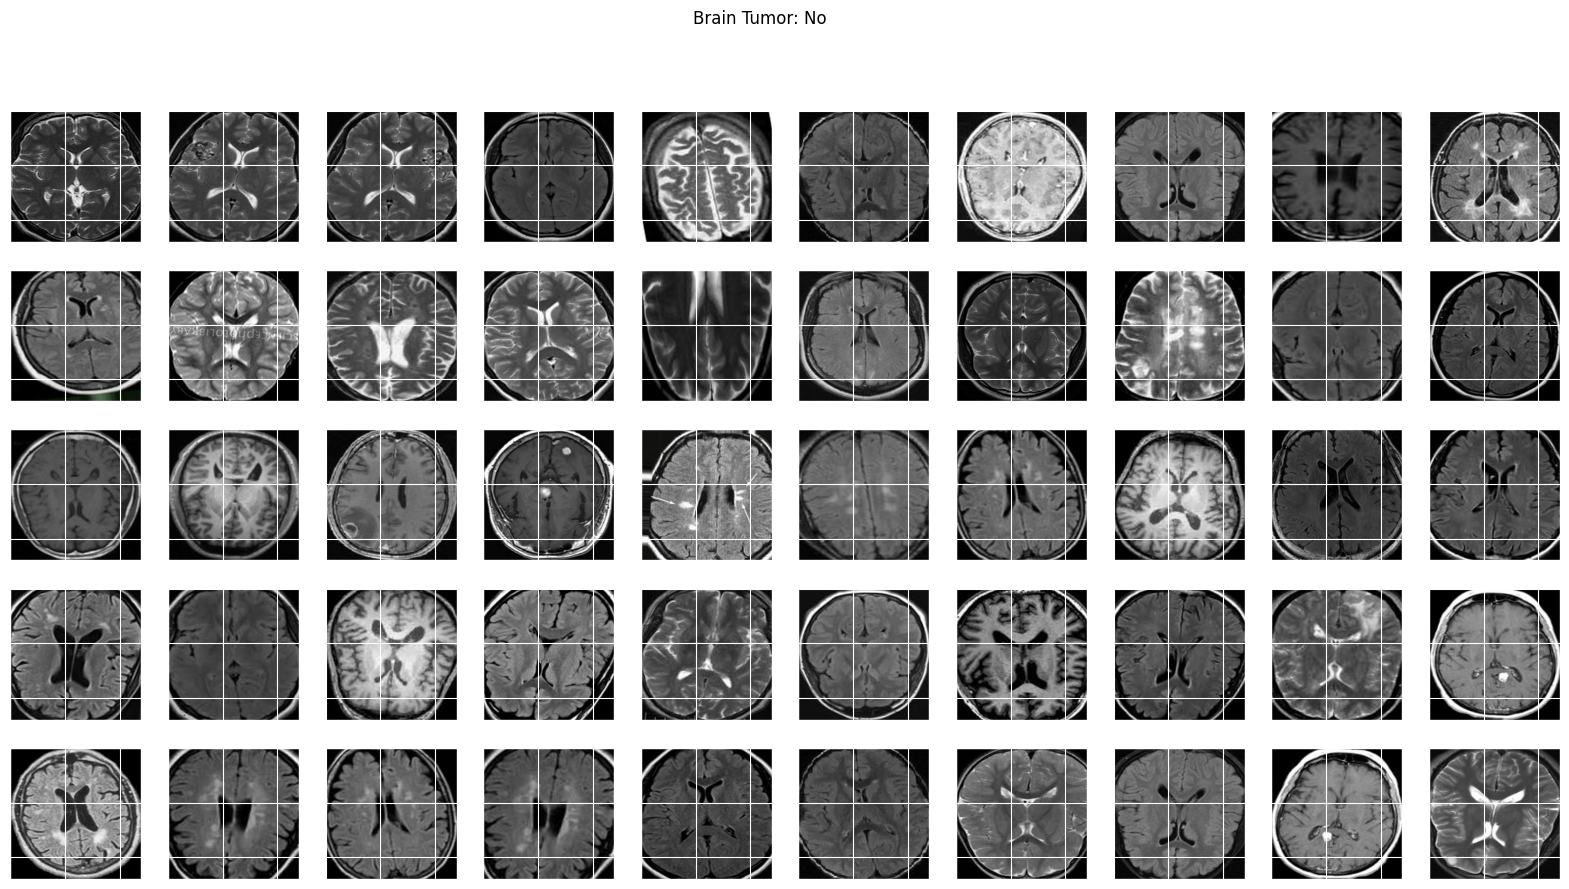

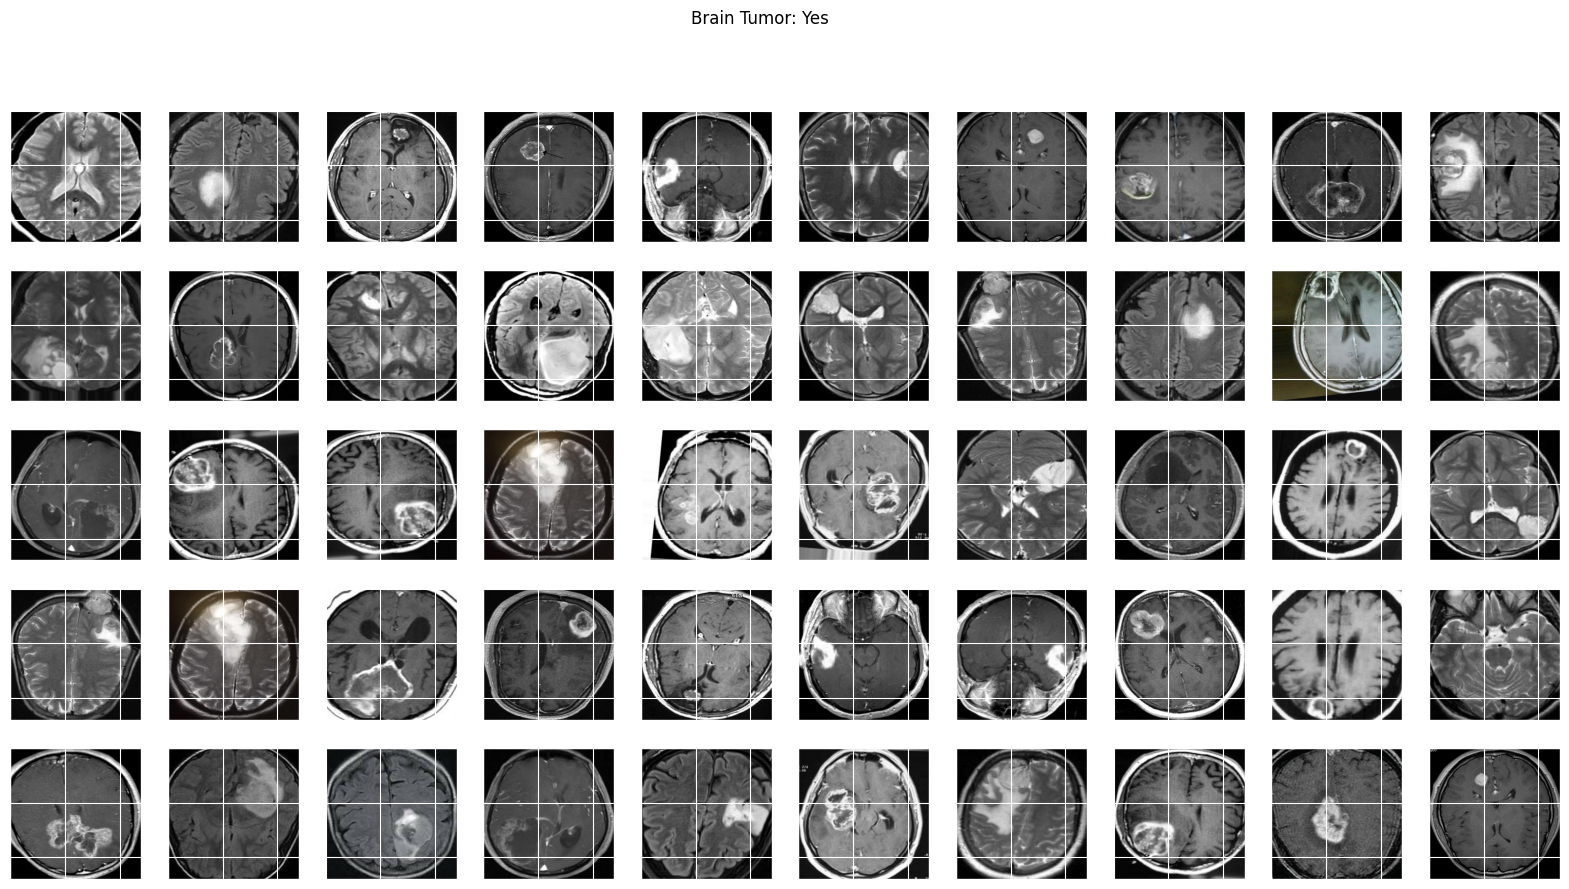

In [24]:
plot_sample_images(X,y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Đường dẫn đến dữ liệu đã tăng cường
augmented_path = 'augmented_data/'
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (128, 128)

# Hàm load_data để tải dữ liệu
def load_data(paths, image_size):
    images = []
    labels = []
    for label, path in enumerate(paths):
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)  # Đọc ảnh
            img = cv2.resize(img, image_size)  # Thay đổi kích thước ảnh
            images.append(img)
            labels.append(label)  # 0 cho 'no', 1 cho 'yes'
    return np.array(images), np.array(labels)


In [27]:
# Tải dữ liệu
X, y = load_data([augmented_yes, augmented_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

In [105]:
from tensorflow.keras.utils import to_categorical
# Chia dữ liệu thành 80% huấn luyện và 20% tạm thời (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Chia tập tạm thời (20%) thành 10% kiểm tra (test) và 10% xác thực (validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuyển đổi nhãn sang định dạng one-hot
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [106]:
print("Hình dạng y_train:", np.shape(y_train))
print("Hình dạng y_val:", np.shape(y_val))
print("Hình dạng y_test:", np.shape(y_test))


Hình dạng y_train: (1652, 2)
Hình dạng y_val: (207, 2)
Hình dạng y_test: (206, 2)


In [30]:
# Chuyển đổi nhãn one-hot về dạng nhị phân
#y_train= np.argmax(y_train, axis=1)  # Chọn chỉ số của lớp với giá trị lớn nhất
#y_val_ = np.argmax(y_val, axis=1)      # Tương tự cho tập xác thực
#y_test = np.argmax(y_test, axis=1)  


In [31]:
# Tạo đối tượng ImageDataGenerator với tăng cường dữ liệu cho tập huấn luyện và chỉ rescale cho tập kiểm tra, xác thực
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [173]:
# Tạo đối tượng ImageDataGenerator với tăng cường dữ liệu cho tập huấn luyện
train_datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=(0.3, 1.0),
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'  
)

# Chỉ rescale cho tập kiểm tra và xác thực

test_datagen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)


In [174]:
 train_generator = train_datagen.flow(X_train, y_train, batch_size=32, seed=42)

In [175]:
  test_generator = train_datagen.flow(X_test, y_test, batch_size=32, seed=42)

In [176]:
 valid_generator = train_datagen.flow(X_val, y_val, batch_size=32, seed=42)

In [164]:
# Kiểm tra kích thước của các tập dữ liệu
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 1652
Validation set size: 207
Test set size: 206


In [112]:
# Kiểm tra kích thước nhãn
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (1652, 2)
y_val shape: (207, 2)
y_test shape: (206, 2)


In [38]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D

In [113]:
import numpy as np

# Kiểm tra kiểu dữ liệu và hình dạng của nhãn
print("Kiểu dữ liệu y_train:", type(y_train))
print("Hình dạng y_train:", np.shape(y_train))
print("Kiểu dữ liệu y_val:", type(y_val))
print("Hình dạng y_val:", np.shape(y_val))


Kiểu dữ liệu y_train: <class 'numpy.ndarray'>
Hình dạng y_train: (1652, 2)
Kiểu dữ liệu y_val: <class 'numpy.ndarray'>
Hình dạng y_val: (207, 2)


# VGG16

In [177]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

In [178]:
input_layer = Input(shape=(128, 128, 3))
x = base_model(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(2, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [179]:
# In tóm tắt mô hình
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 2,097,922 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [180]:
# Model training
history = model.fit(train_generator, batch_size=32, epochs=25, validation_data=valid_generator)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.7073 - loss: 5.7391 - val_accuracy: 0.8551 - val_loss: 0.5087
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8580 - loss: 0.6095 - val_accuracy: 0.9324 - val_loss: 0.1821
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8901 - loss: 0.3177 - val_accuracy: 0.9034 - val_loss: 0.2586
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.8916 - loss: 0.2834 - val_accuracy: 0.9517 - val_loss: 0.1701
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9111 - loss: 0.2537 - val_accuracy: 0.9372 - val_loss: 0.1626
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9264 - loss: 0.1857 - val_accuracy: 0.9324 - val_loss: 0.1534
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9272 - loss: 0.2094 - val_accuracy: 0.9420 - val_loss: 0.1452
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9271 - loss: 0.1878 - val_accuracy: 0.9420 - val

In [ ]:
# Lưu mô hình
model.save('vgg16_model.h5')

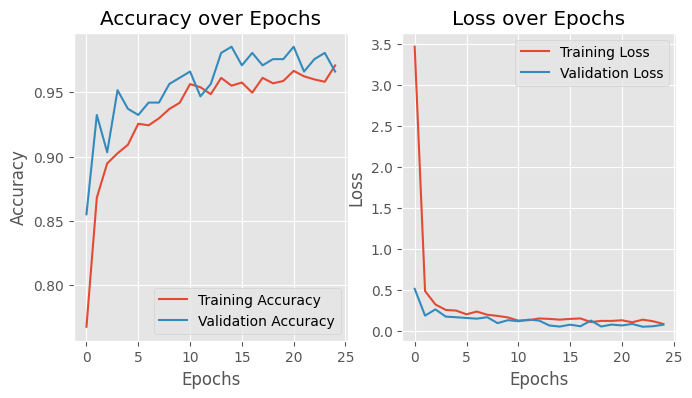

In [186]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [182]:
# Model evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


In [185]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Classification report and confusion matrix
vgg_test_eval = model.evaluate(test_generator)
vgg_val_eval = model.evaluate(valid_generator)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9686 - loss: 0.0752
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9689 - loss: 0.0511
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.97      0.98      0.97        92

    accuracy                           0.98       206
   macro avg       0.98      0.98      0.98       206
weighted avg       0.98      0.98      0.98       206

Confusion Matrix:
 [[111   3]
 [  2  90]]


# RestNet


In [187]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False 

input_layer = Input(shape=(128, 128, 3))
x = base_model(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Thay đổi lớp đầu ra cho phân loại nhiều lớp (2 lớp)
output_layer = Dense(2, activation='softmax')(x)

# Tạo mô hình
model2 = Model(inputs=input_layer, outputs=output_layer)

# Biên dịch mô hình với hàm loss là categorical cross-entropy
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model2.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,977,090 (121.98 MB)

 Trainable params: 8,389,378 (32.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [188]:
# Model training
history2 = model2.fit(train_generator, batch_size=32, epochs=25, validation_data=valid_generator)

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step - accuracy: 0.7437 - loss: 4.3550 - val_accuracy: 0.8986 - val_loss: 0.3658
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.8652 - loss: 0.4484 - val_accuracy: 0.9179 - val_loss: 0.2387
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9007 - loss: 0.2326 - val_accuracy: 0.9034 - val_loss: 0.2015
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9353 - loss: 0.1797 - val_accuracy: 0.9614 - val_loss: 0.1061
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9330 - loss: 0.2041 - val_accuracy: 0.9324 - val_loss: 0.1598
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9396 - loss: 0.1532 - val_accuracy: 0.9517 - val_loss: 0.1133
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9397 - loss: 0.1532 - val_accuracy: 0.9710 - val_loss: 0.1220
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.9334 - loss: 0.1542 - val_accuracy: 

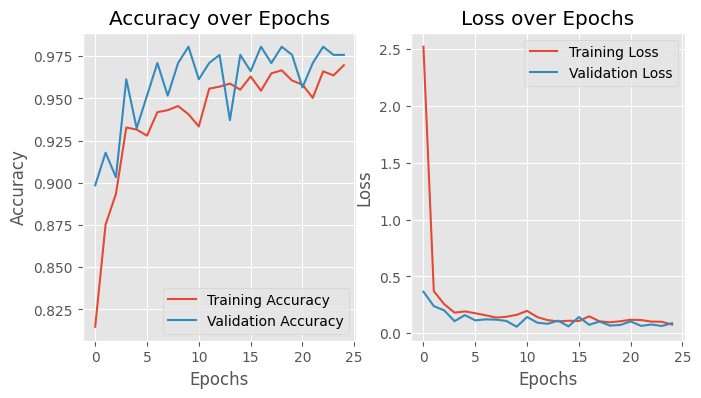

In [189]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [196]:
# Model evaluation
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [198]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Classification report and confusion matrix
rest_test_eval = model2.evaluate(test_generator)
rest_val_eval = model2.evaluate(valid_generator)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9591 - loss: 0.1058
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9649 - loss: 0.0610
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       114
           1       0.99      0.95      0.97        92

    accuracy                           0.97       206
   macro avg       0.97      0.97      0.97       206
weighted avg       0.97      0.97      0.97       206

Confusion Matrix:
 [[113   1]
 [  5  87]]


In [199]:
from sklearn.metrics import accuracy_score 

# InceptionV3

In [200]:
from tensorflow.keras.applications import InceptionV3
# Tải mô hình InceptionV3, loại bỏ lớp fully connected, và khóa các trọng số của nó
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Không train lại các trọng số của InceptionV3

input_layer = Input(shape=(128, 128, 3))
x = base_model(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Thay đổi lớp đầu ra cho phân loại nhiều lớp (2 lớp)
output_layer = Dense(2, activation='softmax')(x)

# Tạo mô hình
model3 = Model(inputs=input_layer, outputs=output_layer)

# Biên dịch mô hình với hàm loss là categorical cross-entropy
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model3.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 2, 2, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,900,706 (91.17 MB)

 Trainable params: 2,097,922 (8.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [206]:
# Model training
history3 = model3.fit(train_generator, batch_size=32, epochs=25, validation_data=valid_generator)

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.6800 - loss: 0.5077 - val_accuracy: 0.8357 - val_loss: 0.3723
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.6708 - loss: 0.5285 - val_accuracy: 0.8599 - val_loss: 0.3569
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.7290 - loss: 0.4964 - val_accuracy: 0.8019 - val_loss: 0.3668
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.7202 - loss: 0.5194 - val_accuracy: 0.8309 - val_loss: 0.3333
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.7246 - loss: 0.5072 - val_accuracy: 0.8019 - val_loss: 0.3493
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.7222 - loss: 0.4843 - val_accuracy: 0.7826 - val_loss: 0.4739
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.7327 - loss: 0.5032 - val_accuracy: 0.8261 - val_loss: 0.3387
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.7595 - loss: 0.4690 - val_accuracy: 0

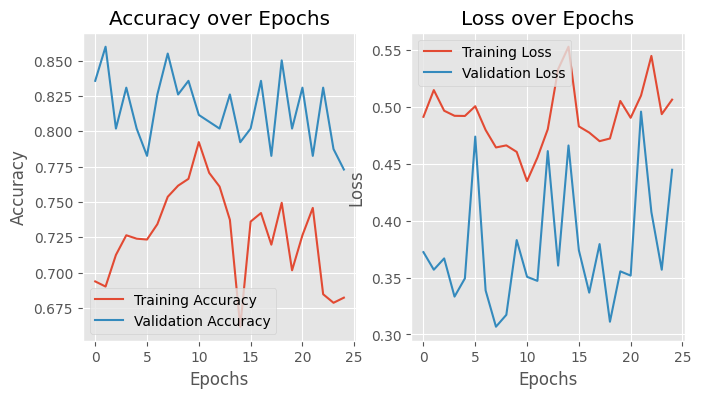

In [207]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [208]:
# Model evaluation
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [209]:

# Classification report and confusion matrix
icv_test_eval = model3.evaluate(test_generator)
icvt_val_eval = model3.evaluate(valid_generator)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.8277 - loss: 0.4094
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.7665 - loss: 0.4652
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       114
           1       0.94      0.66      0.78        92

    accuracy                           0.83       206
   macro avg       0.86      0.81      0.82       206
weighted avg       0.85      0.83      0.82       206

Confusion Matrix:
 [[110   4]
 [ 31  61]]


# MobileNet

In [210]:
from tensorflow.keras.applications import MobileNet
# Tải mô hình MobileNet, loại bỏ lớp fully connected, và khóa các trọng số của nó
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Không train lại các trọng số của MobileNet

# Thêm các lớp của riêng bạn vào mô hình
input_layer = Input(shape=(128, 128, 3))
x = base_model(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Thay đổi lớp đầu ra cho phân loại nhiều lớp (2 lớp)
output_layer = Dense(2, activation='softmax')(x)

# Tạo mô hình
model4 = Model(inputs=input_layer, outputs=output_layer)

# Biên dịch mô hình với hàm loss là categorical cross-entropy
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model4.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,423,938 (28.32 MB)

 Trainable params: 4,195,074 (16.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [211]:
# Huấn luyện mô hình
history4 = model4.fit(train_generator, batch_size=32, epochs=25, validation_data=valid_generator)


Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.6077 - loss: 4.3411 - val_accuracy: 0.7440 - val_loss: 0.5286
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.7798 - loss: 0.4617 - val_accuracy: 0.7633 - val_loss: 0.4071
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8145 - loss: 0.3928 - val_accuracy: 0.7971 - val_loss: 0.3795
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8439 - loss: 0.3702 - val_accuracy: 0.8213 - val_loss: 0.3714
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.8291 - loss: 0.3549 - val_accuracy: 0.7971 - val_loss: 0.3981
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.8562 - loss: 0.3162 - val_accuracy: 0.8309 - val_loss: 0.3479
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8679 - loss: 0.3231 - val_accuracy: 0.8647 - val_loss: 0.3019
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8542 - loss: 0.3508 - val_accuracy: 0

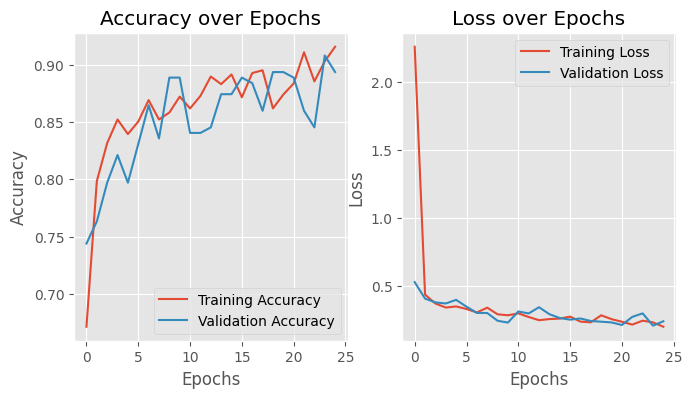

In [212]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [213]:
# Model evaluation
y_pred = model4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step


In [218]:
# Classification report and confusion matrix

mb_test_eval = model4.evaluate(test_generator)
mb_val_eval = model4.evaluate(valid_generator)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9264 - loss: 0.1821
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9338 - loss: 0.1996
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       114
           1       0.86      0.93      0.90        92

    accuracy                           0.90       206
   macro avg       0.90      0.91      0.90       206
weighted avg       0.91      0.90      0.90       206

Confusion Matrix:
 [[100  14]
 [  6  86]]


# CNN

In [219]:
# Xây dựng mạng CNN thông thường
input_layer = Input(shape=(128, 128, 3))

# Khối CNN thứ nhất
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Khối CNN thứ hai
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Khối CNN thứ ba
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten các đặc trưng và thêm các lớp fully connected
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Lớp đầu ra cho phân loại 2 lớp (multiclass với 2 nhãn)
output_layer = Dense(2, activation='softmax')(x)

# Tạo mô hình
model5 = Model(inputs=input_layer, outputs=output_layer)

# Biên dịch mô hình với hàm loss là categorical cross-entropy
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model5.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,482,626 (32.36 MB)

 Trainable params: 8,482,626 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

In [221]:
# Huấn luyện mô hình với 25 epochs
history5 = model5.fit(train_generator, batch_size=32, epochs=25, validation_data=valid_generator)

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.7792 - loss: 0.4545 - val_accuracy: 0.7150 - val_loss: 0.5591
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8030 - loss: 0.4369 - val_accuracy: 0.7101 - val_loss: 0.6026
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.7945 - loss: 0.4465 - val_accuracy: 0.7101 - val_loss: 0.5594
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8146 - loss: 0.4230 - val_accuracy: 0.7101 - val_loss: 0.4971
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8061 - loss: 0.4029 - val_accuracy: 0.7343 - val_loss: 0.5056
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.7990 - loss: 0.4160 - val_accuracy: 0.7150 - val_loss: 0.5003
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.8142 - loss: 0.4089 - val_accuracy: 0.7488 - val_loss: 0.4706
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8286 - loss: 0.3854 - val_accuracy: 0.

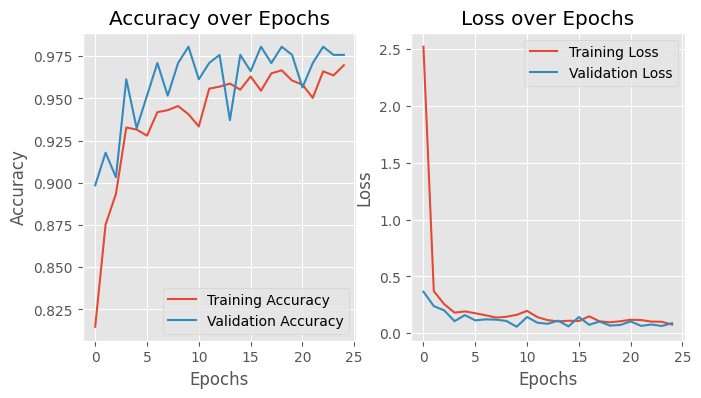

In [222]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [223]:
# Model evaluation
y_pred = model5.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [224]:
# Classification report and confusion matrix
cnn_test_eval = model5.evaluate(test_generator)
cnn_val_eval = model5.evaluate(valid_generator)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.7840 - loss: 0.4176
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.7602 - loss: 0.4301
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.86      0.80      0.83        92

    accuracy                           0.85       206
   macro avg       0.86      0.85      0.85       206
weighted avg       0.85      0.85      0.85       206

Confusion Matrix:
 [[102  12]
 [ 18  74]]


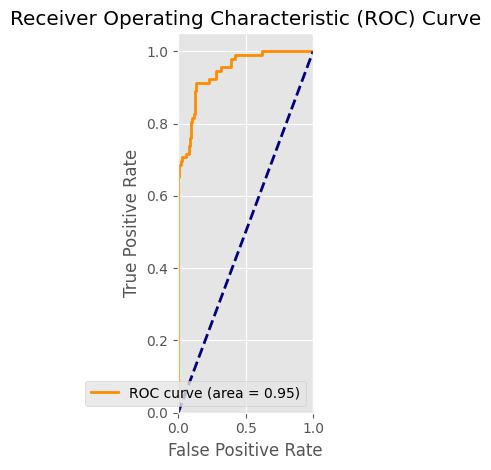

In [225]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

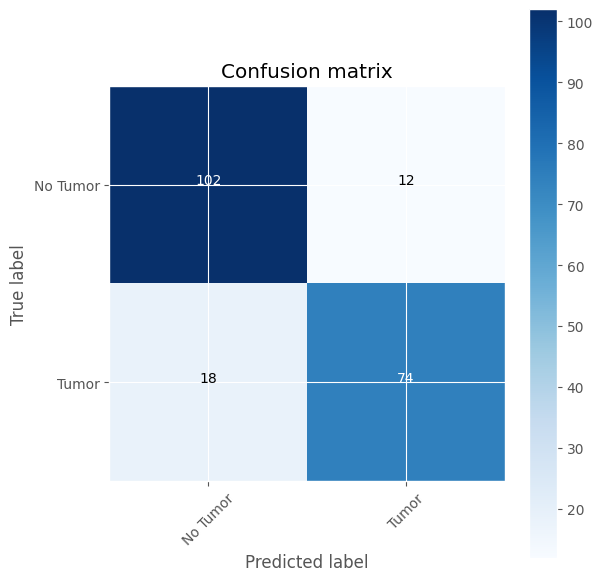

In [226]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true, y_pred_classes)
plot_confusion_matrix(cm, classes=['No Tumor', 'Tumor'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


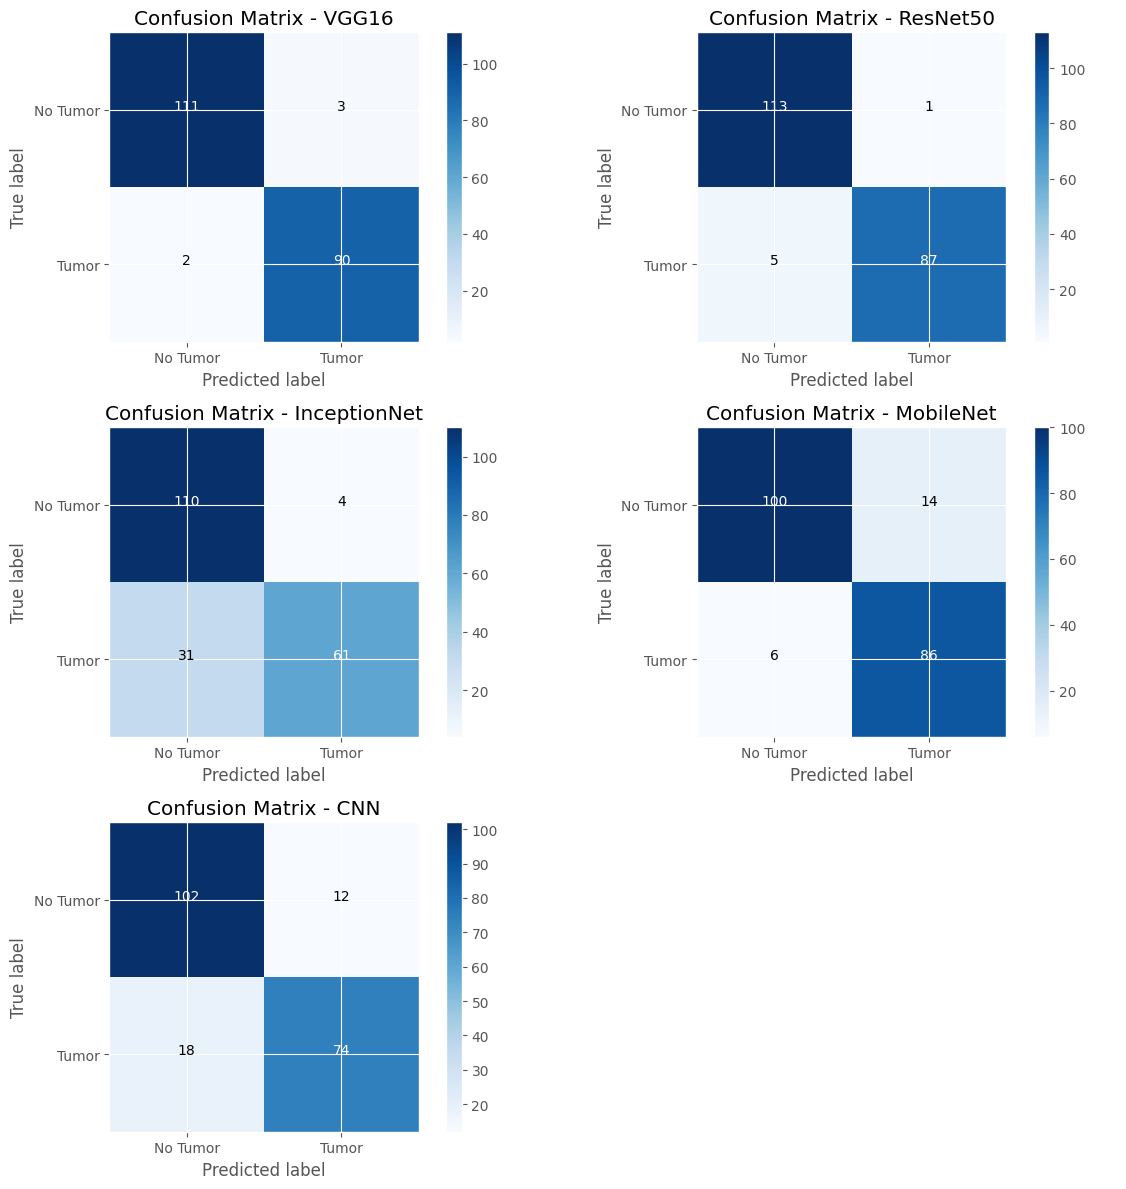

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Giả định các biến chứa nhãn thật và dự đoán từ các mô hình
y_true = np.argmax(y_test, axis=1)
y_pred1 = model.predict(X_test)  # Dự đoán từ model (VGG16)
y_pred2 = model2.predict(X_test)  # Dự đoán từ model2 (ResNet50)
y_pred3 = model3.predict(X_test)  # Dự đoán từ model3 (InceptionNet)
y_pred4 = model4.predict(X_test)  # Dự đoán từ model4 (MobileNet)
y_pred5 = model5.predict(X_test)  # Dự đoán từ model5 (CNN)

# Chuyển đổi dự đoán thành nhãn
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
y_pred_classes4 = np.argmax(y_pred4, axis=1)
y_pred_classes5 = np.argmax(y_pred5, axis=1)

# Hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=0)  # Chữ ngang cho nhãn trục x
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=0)  # Chữ ngang cho nhãn trục y
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # Thêm colorbar cho ma trận nhầm lẫn
    return im

# Tính toán và vẽ ma trận nhầm lẫn cho từng mô hình
models = [y_pred_classes1, y_pred_classes2, y_pred_classes3, y_pred_classes4, y_pred_classes5]
model_titles = ['VGG16', 'ResNet50', 'InceptionNet', 'MobileNet', 'CNN']

# Tạo figure và axes cho bố cục 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Vẽ từng ma trận nhầm lẫn
for i, (y_pred_classes, title) in enumerate(zip(models, model_titles)):
    cm = confusion_matrix(y_true, y_pred_classes)
    ax = axes[i // 2, i % 2]  # Chọn vị trí trong ma trận 3x2
    im = plot_confusion_matrix(cm, classes=['No Tumor', 'Tumor'], title=f'Confusion Matrix - {title}', ax=ax)
    
    # Thêm colorbar cho mỗi ma trận nhầm lẫn
    fig.colorbar(im, ax=ax)

# Tắt axes không sử dụng
for j in range(i + 1, 3 * 2):
    axes[j // 2, j % 2].axis('off')

# Điều chỉnh khoảng cách giữa các hình
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Tăng khoảng cách giữa các hàng (hspace) và cột (wspace)

plt.tight_layout()
plt.show()  # Hiển thị tất cả các ma trận nhầm lẫn


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


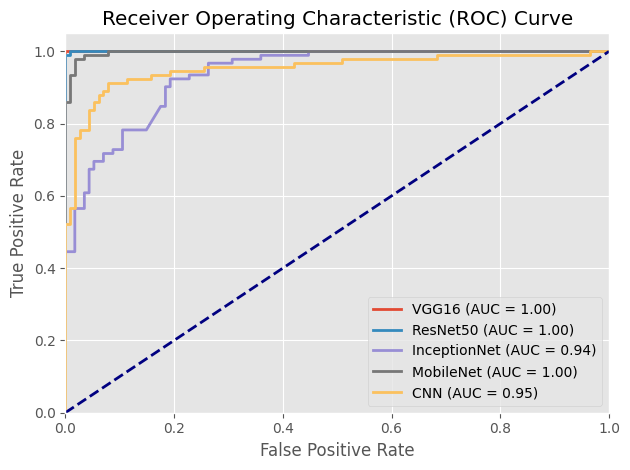

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Giả định các biến chứa nhãn thật và dự đoán xác suất từ các mô hình
y_true = np.argmax(y_test, axis=1)

# Dự đoán xác suất từ các mô hình
y_pred1 = model.predict(X_test)  # Dự đoán từ model (VGG16)
y_pred2 = model2.predict(X_test)  # Dự đoán từ model2 (ResNet50)
y_pred3 = model3.predict(X_test)  # Dự đoán từ model3 (InceptionNet)
y_pred4 = model4.predict(X_test)  # Dự đoán từ model4 (MobileNet)
y_pred5 = model5.predict(X_test)  # Dự đoán từ model5 (CNN)

# Danh sách tên mô hình
model_titles = ['VGG16', 'ResNet50', 'InceptionNet', 'MobileNet', 'CNN']

# Khởi tạo danh sách để lưu FPR, TPR và AUC
fpr_list = []
tpr_list = []
roc_auc_list = []

# Tính toán FPR, TPR và AUC cho từng mô hình
for i, (y_pred, title) in enumerate(zip([y_pred1, y_pred2, y_pred3, y_pred4, y_pred5], model_titles)):
    fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])  # Dự đoán cho lớp 'Tumor'
    roc_auc = auc(fpr, tpr)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)
    
    # Vẽ đường ROC cho mô hình
    plt.plot(fpr, tpr, lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

# Vẽ đường chéo
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# K-fold

In [229]:
print(X.shape)
print(y.shape)


(2065, 128, 128, 3)
(2065,)


In [231]:
# Chuyển đổi nhãn sang định dạng one-hot
y = to_categorical(y, num_classes=2)


In [232]:
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [237]:
def vgg_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False 
    input_layer = Input(shape=(128, 128, 3))
    x = base_model(input_layer, training=False)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(2, activation='softmax')(x)

    # Tạo mô hình
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [238]:
# Định nghĩa số fold 
num_folds = 5
batch_size = 32
no_epochs = 10


# Khởi tạo K-Fold CV
kfold = KFold(n_splits=num_folds, shuffle=True)

# Khởi tạo các danh sách để lưu accuracy và loss
accuracy_list = []
loss_list = []

fold_idx = 1

# K-fold Cross Validation model evaluation
for train_ids, val_ids in kfold.split(X, y):

    model = vgg_model()  

    print(f"Bắt đầu train Fold {fold_idx}")

    # Train model
    model.fit(X[train_ids], y[train_ids],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=1)

    # Test và in kết quả
    scores = model.evaluate(X[val_ids], y[val_ids], verbose=0)
    print(f"Đã train xong Fold {fold_idx}")

    # Thêm thông tin accuracy và loss vào list
    accuracy_list.append(scores[1] * 100)
    loss_list.append(scores[0])

    # Sang Fold tiếp theo
    fold_idx += 1

# In kết quả tổng thể sau K-Fold CV
print('* Chi tiết các fold')
for i in range(len(accuracy_list)):
    print(f'> Fold {i+1} - Loss: {loss_list[i]:.4f} - Accuracy: {accuracy_list[i]:.2f}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy trung bình: {np.mean(accuracy_list):.2f}% (Độ lệch +- {np.std(accuracy_list):.2f})')
print(f'> Loss trung bình: {np.mean(loss_list):.4f}')

Bắt đầu train Fold 1
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7623 - loss: 5.3665
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8965 - loss: 0.8199
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9356 - loss: 0.2394
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9593 - loss: 0.1166
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9741 - loss: 0.0920
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9838 - loss: 0.0527
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9876 - loss: 0.0453
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9829 - loss: 0.0557
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9820 - loss: 0.0573
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9844 - loss: 0.0442
Đã train xong Fold 1
Bắt đầu train Fold 2
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7220 - loss: 8.9928
E

# K-fold RestNet


In [244]:
# Định nghĩa hàm tạo mô hình ResNet50
def resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False 

    input_layer = Input(shape=(128, 128, 3))
    x = base_model(input_layer, training=False)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Thay đổi lớp đầu ra cho phân loại nhiều lớp (2 lớp)
    output_layer = Dense(2, activation='softmax')(x)

    # Tạo mô hình
    model2 = Model(inputs=input_layer, outputs=output_layer)

    # Biên dịch mô hình với hàm loss là categorical cross-entropy
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model2

In [245]:
# Định nghĩa số fold 
num_folds = 5
batch_size = 32
no_epochs = 10


# Khởi tạo K-Fold CV
kfold = KFold(n_splits=num_folds, shuffle=True)

# Khởi tạo các danh sách để lưu accuracy và loss
accuracy_list = []
loss_list = []

fold_idx = 1

# K-fold Cross Validation model evaluation
for train_ids, val_ids in kfold.split(X, y):

    model2 = resnet_model()  

    print(f"Bắt đầu train Fold {fold_idx}")

    # Train model
    model2.fit(X[train_ids], y[train_ids],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=1)

    # Test và in kết quả
    scores = model2.evaluate(X[val_ids], y[val_ids], verbose=0)
    print(f"Đã train xong Fold {fold_idx}")

    # Thêm thông tin accuracy và loss vào list
    accuracy_list.append(scores[1] * 100)
    loss_list.append(scores[0])

    # Sang Fold tiếp theo
    fold_idx += 1

# In kết quả tổng thể sau K-Fold CV
print('* Chi tiết các fold')
for i in range(len(accuracy_list)):
    print(f'> Fold {i+1} - Loss: {loss_list[i]:.4f} - Accuracy: {accuracy_list[i]:.2f}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy trung bình: {np.mean(accuracy_list):.2f}% (Độ lệch +- {np.std(accuracy_list):.2f})')
print(f'> Loss trung bình: {np.mean(loss_list):.4f}')

Bắt đầu train Fold 1
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.6552 - loss: 6.2988
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8968 - loss: 0.2678
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9221 - loss: 0.1869
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9516 - loss: 0.1133
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9727 - loss: 0.0836
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9751 - loss: 0.0653
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9682 - loss: 0.0711
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9890 - loss: 0.0433
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9777 - loss: 0.0552
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9873 - loss: 0.0506
Đã train xong Fold 1
Bắt đầu train Fold 2
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.7393 - loss: 7.0674

In [248]:
# Định nghĩa hàm tạo mô hình InceptionV3
def InceptionV3_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False  # Không train lại các trọng số của InceptionV3

    input_layer = Input(shape=(128, 128, 3))
    x = base_model(input_layer, training=False)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Lớp đầu ra cho phân loại nhị phân
    output_layer = Dense(2, activation='softmax')(x)  # Một neuron cho phân loại nhị phân

    # Tạo mô hình
    model3 = Model(inputs=input_layer, outputs=output_layer)

    # Biên dịch mô hình với hàm loss là binary cross-entropy
    model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model3

In [249]:
# Định nghĩa số fold 
num_folds = 5
batch_size = 32
no_epochs = 10


# Khởi tạo K-Fold CV
kfold = KFold(n_splits=num_folds, shuffle=True)

# Khởi tạo các danh sách để lưu accuracy và loss
accuracy_list = []
loss_list = []

fold_idx = 1

# K-fold Cross Validation model evaluation
for train_ids, val_ids in kfold.split(X, y):

    model3 = InceptionV3_model()  

    print(f"Bắt đầu train Fold {fold_idx}")

    # Train model
    model3.fit(X[train_ids], y[train_ids],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=1)

    # Test và in kết quả
    scores = model3.evaluate(X[val_ids], y[val_ids], verbose=0)
    print(f"Đã train xong Fold {fold_idx}")

    # Thêm thông tin accuracy và loss vào list
    accuracy_list.append(scores[1] * 100)
    loss_list.append(scores[0])

    # Sang Fold tiếp theo
    fold_idx += 1

# In kết quả tổng thể sau K-Fold CV
print('* Chi tiết các fold')
for i in range(len(accuracy_list)):
    print(f'> Fold {i+1} - Loss: {loss_list[i]:.4f} - Accuracy: {accuracy_list[i]:.2f}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy trung bình: {np.mean(accuracy_list):.2f}% (Độ lệch +- {np.std(accuracy_list):.2f})')
print(f'> Loss trung bình: {np.mean(loss_list):.4f}')

Bắt đầu train Fold 1
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.6585 - loss: 56.0750
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7483 - loss: 0.7635
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7382 - loss: 0.5659
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7610 - loss: 0.4703
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7930 - loss: 0.4280
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8089 - loss: 0.4168
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8294 - loss: 0.3837
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7713 - loss: 0.4264
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7747 - loss: 0.4381
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6655 - loss: 0.5006
Đã train xong Fold 1
Bắt đầu train Fold 2
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.6557 - loss: 56.

# mobileNet

In [250]:
def MobileNet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False

    input_layer = Input(shape=(128, 128, 3))
    x = base_model(input_layer, training=False)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(2, activation='softmax')(x)

    model4 = Model(inputs=input_layer, outputs=output_layer)
    model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model4

In [251]:
from tensorflow.keras.applications import MobileNet
num_folds = 5
batch_size = 32
no_epochs = 10

kfold = KFold(n_splits=num_folds, shuffle=True)

accuracy_list = []
loss_list = []

fold_idx = 1

for train_ids, val_ids in kfold.split(X, y):
    model4 = MobileNet_model()
    
    print(f"Bắt đầu train Fold {fold_idx}")

    model4.fit(X[train_ids], y[train_ids],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=1)

    scores = model4.evaluate(X[val_ids], y[val_ids], verbose=0)
    print(f"Đã train xong Fold {fold_idx}")

    accuracy_list.append(scores[1] * 100)
    loss_list.append(scores[0])

    fold_idx += 1

print('* Chi tiết các fold')
for i in range(len(accuracy_list)):
    print(f'> Fold {i+1} - Loss: {loss_list[i]:.4f} - Accuracy: {accuracy_list[i]:.2f}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy trung bình: {np.mean(accuracy_list):.2f}% (Độ lệch +- {np.std(accuracy_list):.2f})')
print(f'> Loss trung bình: {np.mean(loss_list):.4f}')

Bắt đầu train Fold 1
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6181 - loss: 4.8934
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8462 - loss: 0.3689
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8912 - loss: 0.2485
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9199 - loss: 0.2036
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9361 - loss: 0.1547
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9678 - loss: 0.1064
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9608 - loss: 0.0988
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9712 - loss: 0.0826
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9788 - loss: 0.0629
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9803 - loss: 0.0606
Đã train xong Fold 1
Bắt đầu train Fold 2
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.6155 - loss: 5.7379
Epoch 2/10

# CNN

In [254]:
# Định nghĩa hàm tạo mô hình CNN
def CNN_model():
    input_layer = Input(shape=(128, 128, 3))

    # Khối CNN thứ nhất
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Khối CNN thứ hai
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Khối CNN thứ ba
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten các đặc trưng và thêm các lớp fully connected
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Lớp đầu ra cho phân loại nhị phân
    output_layer = Dense(2, activation='softmax')(x)  # Một neuron cho phân loại nhị phân

    # Tạo mô hình
    model5 = Model(inputs=input_layer, outputs=output_layer)

    # Biên dịch mô hình với hàm loss là binary cross-entropy
    model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model5

In [255]:
# Định nghĩa số fold 
num_folds = 5
batch_size = 32
no_epochs = 10

# Khởi tạo K-Fold CV
kfold = KFold(n_splits=num_folds, shuffle=True)

# Khởi tạo các danh sách để lưu accuracy và loss
accuracy_list = []
loss_list = []

fold_idx = 1

# K-fold Cross Validation model evaluation
for train_ids, val_ids in kfold.split(X, y):  # X là dữ liệu đầu vào, y là nhãn

    model5 = CNN_model()  

    print(f"Bắt đầu train Fold {fold_idx}")

    # Huấn luyện mô hình
    model5.fit(X[train_ids], y[train_ids],
               batch_size=batch_size,
               epochs=no_epochs,
               verbose=1)

    # Đánh giá mô hình và in kết quả
    scores = model5.evaluate(X[val_ids], y[val_ids], verbose=0)
    print(f"Đã train xong Fold {fold_idx}")

    # Thêm thông tin accuracy và loss vào list
    accuracy_list.append(scores[1] * 100)  # scores[1] là accuracy
    loss_list.append(scores[0])             # scores[0] là loss

    # Sang Fold tiếp theo
    fold_idx += 1

# In kết quả tổng thể sau K-Fold CV
print('* Chi tiết các fold')
for i in range(len(accuracy_list)):
    print(f'> Fold {i+1} - Loss: {loss_list[i]:.4f} - Accuracy: {accuracy_list[i]:.2f}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy trung bình: {np.mean(accuracy_list):.2f}% (Độ lệch +- {np.std(accuracy_list):.2f})')
print(f'> Loss trung bình: {np.mean(loss_list):.4f}')

Bắt đầu train Fold 1
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.5954 - loss: 49.6352
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7260 - loss: 0.5363
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7975 - loss: 0.4462
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8042 - loss: 0.4154
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8270 - loss: 0.3708
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8536 - loss: 0.3362
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8899 - loss: 0.2730
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8946 - loss: 0.2476
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9139 - loss: 0.2215
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9343 - loss: 0.1813
Đã train xong Fold 1
Bắt đầu train Fold 2
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.6089 - loss: 46.8098
Epoch